In [3]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 1.9 MB/s eta 0:00:01


In [4]:
#libraries

import csv
import json
import pandas as pd
from nltk.probability import FreqDist
from pprint import pprint
import nltk
from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
from textblob.classifiers import NaiveBayesClassifier
from textblob import TextBlob
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [5]:
import os
cwd = os.getcwd()
print("Estou na diretoria", cwd)

Estou na diretoria /Users/macbookpro/Documents/pratica-jupter/Text_Mining


## Read Document: training and test set 

In [119]:
data=[]
with open("Tweets_EN_sentiment_train.csv", encoding="utf-8") as csvfile:
    reader = csv.DictReader(csvfile )
    for d in reader:
        data.append((d["tweet"],d["text"],d["class"])) 
data

[('1229448571', 'some count sheep, you count cats ', 'pos'),
 ('1230261573',
  "We haven't been to Turning Stone in ages! Have a great time ",
  'pos'),
 ('1228861415', 'What up ', 'pos'),
 ('1228489365', "I'm good ", 'pos'),
 ('1229800235',
  "I know, wonder if USER is going to buy an apartment after he's bought the jets ",
  'pos'),
 ('1230646056', 'ok cool ', 'pos'),
 ('1228964793', "USER Facebook is down. It's not you guys ", 'pos'),
 ('1230178894',
  'Sorry I forgot my &lt;sarcasm&gt; tags. I find I need to use those a lot. ',
  'pos'),
 ('1228887834',
  'Dude. Your stuff on mutiny.in kinda egged me on Hats off',
  'pos'),
 ('1229831457', '1st year of high school  (vmbo, pretty simple :p)', 'pos'),
 ('1229562656',
  "I have to agree with USER Design...I have Vista-the most hated of them all-and haven't had a freeze up in a year ",
  'pos'),
 ('1230682035',
  'lining at the bottom of your bird cage is a good one  USER haha thats thats one thing that i really think CAN be generalise

In [120]:
twetters = []
with open("Tweets_EN_sentiment_train.csv", encoding="utf-8") as csvfile:
    reader = csv.DictReader(csvfile )
    for d in reader:
        twetters.append((d["text"])) 


In [121]:
df = pd.read_csv('Tweets_EN_sentiment_train.csv',delimiter=',')

df_one = pd.get_dummies(df["class"])
#pd.factorize(df['class'])[0]
df_two = pd.concat((df_one, df), axis=1)
df_two = df_two.drop(["neg"], axis=1)
df_result = df_two.rename(columns={"pos": "code"}) 

df_result

code       tweet                                               text  \
0         1  1229448571                  some count sheep, you count cats    
1         1  1230261573  We haven't been to Turning Stone in ages! Have...   
2         1  1228861415                                           What up    
3         1  1228489365                                          I'm good    
4         1  1229800235  I know, wonder if USER is going to buy an apar...   
...     ...         ...                                                ...   
39931     1  1230130325                                    LOL- F, please    
39932     0  1229250927  I wish I could do that too! But it ain't happe...   
39933     1  1228710021                    I &lt;3 my boyfriend's family.    
39934     0  1228100681                                               404    
39935     1  1229022675  RT USER ok i can still tweet but admit i am a ...   

      class  
0       pos  
1       pos  
2       pos  
3       pos  
4       pos  
...     ...  
39931   pos  
39932   neg  
39933   pos  
39934   neg  
39935   pos  

[39936 rows x 4 columns]

In [122]:
texto=[]
for index,item in enumerate(data):
    if index <=100:
        texto.append((item[1]))
    
type(texto)

list

## VADER sentiment

In [123]:
analyzer_sentiment = []
analyzer = SentimentIntensityAnalyzer()

def Sentiment_Intensity_Analyzer(twetters):
    for t in twetters:
        analyze = analyzer.polarity_scores(t)
        analyzer_sentiment.append(analyze)
    print(analyzer_sentiment)

Sentiment_Intensity_Analyzer(twetters)

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'compound': 0.6588}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'compound': 0.4404}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5423}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.085, 'neu': 0.915, 'pos': 0.0, 'compound': -0.0772}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.4939}, {'neg': 0.208, 'neu': 0.7, 'pos': 0.092, 'compound': -0.4838}, {'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'compound': 0.8118}, {'neg': 0.211, 'neu': 0.542, 'pos': 0.247, 'compound': 0.1531}, {'neg': 0.148, 'neu': 0.547, 'pos': 0.305, 'compound': 0.4601}, {'neg': 0.336, 'neu': 0.664, 'pos': 0.0, 'compound': -0.7964}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.561, 'pos': 0.439, 'comp

## TextBlob - Polarity

In [124]:
train =[]
sentimento= "";
for t in  texto:
    if  TextBlob(t).sentiment.polarity >0:
        sentimento = "Positivo"
        train.append((t,sentimento))
    elif TextBlob(t).sentiment.polarity <0:
        sentimento = "Negativo"
        train.append((t,sentimento))
    print(t, "==>",TextBlob(t).sentiment)

some count sheep, you count cats  ==> Sentiment(polarity=0.0, subjectivity=0.0)
We haven't been to Turning Stone in ages! Have a great time  ==> Sentiment(polarity=0.8, subjectivity=0.75)
What up  ==> Sentiment(polarity=0.0, subjectivity=0.0)
I'm good  ==> Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
I know, wonder if USER is going to buy an apartment after he's bought the jets  ==> Sentiment(polarity=0.0, subjectivity=0.0)
ok cool  ==> Sentiment(polarity=0.425, subjectivity=0.575)
USER Facebook is down. It's not you guys  ==> Sentiment(polarity=-0.15555555555555559, subjectivity=0.2888888888888889)
Sorry I forgot my &lt;sarcasm&gt; tags. I find I need to use those a lot.  ==> Sentiment(polarity=-0.5, subjectivity=1.0)
Dude. Your stuff on mutiny.in kinda egged me on Hats off ==> Sentiment(polarity=0.0, subjectivity=0.0)
1st year of high school  (vmbo, pretty simple :p) ==> Sentiment(polarity=0.29000000000000004, subjectivity=0.7242857142857143)
I have to agree with USER Des

## TextBlob - subjectivity and polarity

In [125]:
def textBlob_function(twetters):
    for t in twetters:
        polarity_subjectivity = TextBlob(t).sentiment
        print(polarity_subjectivity)
        
textBlob_function(twetters)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.425, subjectivity=0.575)
Sentiment(polarity=-0.15555555555555559, subjectivity=0.2888888888888889)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.29000000000000004, subjectivity=0.7242857142857143)
Sentiment(polarity=-0.2, subjectivity=0.6)
Sentiment(polarity=0.365625, subjectivity=0.525)
Sentiment(polarity=-0.3, subjectivity=0.6666666666666666)
Sentiment(polarity=0.44999999999999996, subjectivity=0.5)
Sentiment(polarity=0.09999999999999999, subjectivity=0.5666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5666666666666668)
Sentiment(polarity=0.2, subjectivity=0.1)
Sentiment(polarity=-0.1, subjectivity=0.0)
Sentiment(polarity=0.5, subject

Sentiment(polarity=0.0, subjectivity=0.5416666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.3499999999999999, subjectivity=0.6458333333333333)
Sentiment(polarity=0.425, subjectivity=0.575)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3, subjectivity=0.2)
Sentiment(polarity=0.09226190476190477, subjectivity=0.7142857142857143)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.06727272727272728, subjectivity=0.2509090909090909)
Sentiment(polarity=-0.25, subjectivity=0.14999999999999997)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.2, subjectivity=0.1)
Sentiment(polarity=0.5468750000000001, 

Sentiment(polarity=0.8, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.2)
Sentiment(polarity=0.325, subjectivity=0.55)
Sentiment(polarity=0.25, subjectivity=0.2)
Sentiment(polarity=0.20833333333333334, subjectivity=0.625)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.8, subjectivity=0.9)
Sentiment(polarity=0.26, subjectivity=0.26)
Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Sentiment(polarity=0.32499999999999996, subjectivity=0.775)
Sentiment(polarity=0.25, subjectivity=0.3)
Sentiment(polarity=0.028571428571428564, subjectivity=0.6523809523809524)
Sentiment(polarity=-0.34375, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.17500000000000002, subjectivity=0.7666666666666666)
Sentiment(polarity=0.4875, subjectivity=0.575)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.25, subjectivity=0.55)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.0,

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.48125, subjectivity=0.84375)
Sentiment(polarity=0.0, subjectivity=0.3666666666666667)
Sentiment(polarity=0.225, subjectivity=0.6)
Sentiment(polarity=0.3666666666666667, subjectivity=0.7000000000000001)
Sentiment(polarity=-0.033333333333333326, subjectivity=0.18333333333333335)
Sentiment(polarity=-0.2625, subjectivity=0.43333333333333335)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=-0.13950892857142855, subjectivity=0.21428571428571427)
Sentiment(polarity=0.8, subjectivity=0.7)
Sentiment(polarity=0.6, subjectivity=0.7000000000000001)
Sentiment(polarity=0.3333333333333333, subjectivity=0.6666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6

Sentiment(polarity=0.0, subjectivity=0.0625)
Sentiment(polarity=0.5041666666666667, subjectivity=0.3833333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3125, subjectivity=0.2)
Sentiment(polarity=0.6499999999999999, subjectivity=0.8)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.4)
Sentiment(polarity=0.041666666666666664, subjectivity=0.06666666666666667)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.016666666666666663, subjectivity=0.45)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.75, subjectivity=0.7833333333333333)
Sentiment(polarity=0.625, subjectivity=0.8888888888888888)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.784375, subjectivity=0.9225000000000001)
Sen

Sentiment(polarity=0.45, subjectivity=0.55)
Sentiment(polarity=0.85, subjectivity=1.0)
Sentiment(polarity=0.4166666666666667, subjectivity=0.6333333333333333)
Sentiment(polarity=-0.24464285714285716, subjectivity=0.30714285714285716)
Sentiment(polarity=0.38333333333333336, subjectivity=0.65)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.319047619047619, subjectivity=0.7785714285714286)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=-0.1375, subjectivity=0.3875)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.06666666666666667, subjectivity=0.5666666666666667)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.5833333333333334, subjectivity=0.7000000000000001)
Sentiment(polarity=0.3194444444444444, subjectivity=0.3444444444444444)
Sentiment(polarity=0.1454545454545

Sentiment(polarity=-0.09999999999999999, subjectivity=0.65)
Sentiment(polarity=0.5428571428571429, subjectivity=0.7678571428571428)
Sentiment(polarity=0.03571428571428571, subjectivity=0.21428571428571427)
Sentiment(polarity=0.15, subjectivity=0.1125)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5785714285714285, subjectivity=0.6428571428571428)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.73828125, subjectivity=0.55)
Sentiment(polarity=0.25, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=-0.3, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.125, subjectivity=0.4)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.125, subjectivity=0.675)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.00454545

Sentiment(polarity=0.2, subjectivity=0.5)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.625, subjectivity=0.8888888888888888)
Sentiment(polarity=-0.0625, subjectivity=0.15)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.85, subjectivity=0.675)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=-0.6, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.8125, subjectivity=0.55)
Sentiment(polarity=0.475, subjectivity=0.7250000000000001)
Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.09895833333333331, subjectivity=0.6472222222222221)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.75, subjectivity=0.8)
Sentiment(polarity=0.5625, subjectivity=0.4)
Sentiment(polarity=-0.04999999999999999, subjectivity=0.39999999999999997)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=1.0, subjectivity=1.0)
Sen

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.30000000000000004, subjectivity=0.375)
Sentiment(polarity=-0.25, subjectivity=0.75)
Sentiment(polarity=-0.3333333333333333, subjectivity=0.6666666666666666)
Sentiment(polarity=0.25, subjectivity=0.3333333333333333)
Sentiment(polarity=0.1, subjectivity=0.3)
Sentiment(polarity=0.65, subjectivity=0.625)
Sentiment(polarity=0.2875, subjectivity=0.48750000000000004)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3645833333333333, subjectivity=0.75)
Sentiment(polarity=0.5249999999999999, subjectivity=0.625)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Senti

Sentiment(polarity=0.25, subjectivity=0.3333333333333333)
Sentiment(polarity=0.18333333333333335, subjectivity=0.26666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.037500000000000006, subjectivity=0.2333333333333333)
Sentiment(polarity=-0.25, subjectivity=0.65)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.31666666666666665, subjectivity=0.3666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.16666666666666666, subjectivity=0.3666666666666667)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.125, subjectivit

Sentiment(polarity=0.4666666666666666, subjectivity=0.5499999999999999)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.35625, subjectivity=0.42500000000000004)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.8, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.4)
Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=-0.75, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.8, subjectivity=0.7)
Sentiment(polarity=-0.6, subjectivity=1.0)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.4, subjectivity=0.8)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.8500000000000001)
Sentiment(polarity=0.1953125, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=-0.2, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2857142857142857, su

Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Sentiment(polarity=0.625, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.45, subjectivity=0.6944444444444444)
Sentiment(polarity=0.3125, subjectivity=0.2)
Sentiment(polarity=-0.2, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.8)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3333333333333333, subjectivity=0.5)
Sentiment(polarity=0.25, subjectivity=0.8500000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5625, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.16666666666666666, subjectivity=0.5)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=-0.0625, subjectivity=0.16666666666666666)
Sentiment(polarity=0.0, subjectivit

Sentiment(polarity=0.55, subjectivity=0.95)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.3, subjectivity=0.775)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.10000000000000003, subjectivity=0.85)
Sentiment(polarity=0.234375, subjectivity=0.375)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.375, subjectivity=0.775)
Sentiment(polarity=-0.3125, subjectivity=0.6875)
Sentiment(polarity=0.0, subjectivity=0.3)
Sentiment(polarity=0.3125, subjectivity=0.4125)
Sentiment(polarity=-0.3333333333333333, subjectivity=0.6666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.07692307692307693)
Sentiment(polarity=0.5, subjectivity=0.30000000000000004)
Sentiment(polarity=-0.15, subjectivity=0.4)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.24722222222222223, subjectivity=0.6916666666666668)
Sentiment(polarity

Sentiment(polarity=-0.3, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.8)
Sentiment(polarity=0.4681818181818182, subjectivity=0.7272727272727273)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.25, subjectivity=0.2)
Sentiment(polarity=0.1, subjectivity=0.2)
Sentiment(polarity=0.4, subjectivity=0.9)
Sentiment(polarity=0.25, subjectivity=0.2)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.5266666666666667, subjectivity=0.7166666666666667)
Sentiment(polarity=0.65, subjectivity=0.625)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.43333333333333335, subjectivity=0.6166666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=-0.6, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.9)
Senti

Sentiment(polarity=0.3333333333333333, subjectivity=0.4666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.15, subjectivity=0.525)
Sentiment(polarity=0.4, subjectivity=0.5)
Sentiment(polarity=0.01785714285714285, subjectivity=0.7123015873015872)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.012500000000000025, subjectivity=0.4125)
Sentiment(polarity=0.125, subjectivity=0.6125)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.4, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.375)
Sentiment(polarity=0.5625, subjectivity=0.55)
Sentiment(polarity=0.06818181818181818, subjectivity=0.7272727272727273)
Sentiment(polarity=0.22499999999999998, subjectivity=0.25)
Sentiment(polarity=0.39999999999999997, subjectivity=0.4000000000000001)
Sentiment(polarity=0.0625, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.8888888888888888)
Sentiment(polarity=0.15079365079365079, subjectivi

Sentiment(polarity=-0.2, subjectivity=0.05)
Sentiment(polarity=0.2791666666666667, subjectivity=0.35555555555555557)
Sentiment(polarity=0.1416666666666667, subjectivity=0.5833333333333334)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.1, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.5, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.05, subjectivity=0.8)
Sentiment(polarity=0.5523809523809523, subjectivity=0.8119047619047618)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.30000000000000004)
Sentiment(polarity=0.6043560606060606, subjectivity=0.7181818181818181)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5052083333333334, subjectivity=0.7333333333333334)
Sentiment(polarity=-0.01666666

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.375, subjectivity=0.75)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=-0.7142857142857143, subjectivity=0.8571428571428571)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.23392857142857143, subjectivity=0.3857142857142857)
Sentiment(polarity=0.2333333333333333, subjectivity=0.5166666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.35, subjectivity=0.65)
Sentiment(polarity=0.25, subjectivity=0.30000000000000004)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=0.7)
Sentiment(polarity=0.2708333333333333, subjectivity=0.7999999999999999)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.8, subjectivity=0.8)
Sentiment(polarity=0.14788961038961038, subjectivity=0.5006493506493507)
Sentiment(polarity=-0.09999999999999999, subjectivity

Sentiment(polarity=-0.06666666666666667, subjectivity=0.10833333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Sentiment(polarity=0.251010101010101, subjectivity=0.38484848484848483)
Sentiment(polarity=0.0, subjectivity=0.3)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.16818181818181818, subjectivity=0.4772727272727273)
Sentiment(polarity=-0.78125, subjectivity=0.7)
Sentiment(polarity=0.15000000000000002, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=-0.1, subjectivity=0.0)
Sentiment(polarity=0.03125, subjectivity=0.5)
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2125, subjectivity=0.65)
Sentiment(polarity=0.08333333333333333, subjectivity=0.34523809523809523)
Sentiment(polarity=0.6, 

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.037500000000000006, subjectivity=0.51875)
Sentiment(polarity=-0.4, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.234375, subjectivity=0.1)
Sentiment(polarity=0.4375, subjectivity=0.35)
Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Sentiment(polarity=-0.013020833333333334, subjectivity=0.525)
Sentiment(polarity=0.20833333333333334, subjectivity=0.6083333333333334)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.8333333333333334, subjectivity=0.7000000000000001)
Sentiment(polarity=0.4, subjectivity=0.375)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=-0.1, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.35)
Sentiment(polarity=0.475, subjectivity=0.7250000000000001)
Sentiment(polarity=0.7, subjectivity=0.6000000000

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.44285714285714284, subjectivity=0.7678571428571428)
Sentiment(polarity=0.45, subjectivity=0.8333333333333334)
Sentiment(polarity=-0.35454545454545455, subjectivity=0.7515151515151515)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.1, subjectivity=0.425)
Sentiment(polarity=0.25, subjectivity=0.5)
Sentiment(polarity=-0.04464285714285715, subjectivity=0.6785714285714286)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.39999999999999997, subjectivity=0.8)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.07500000000000001, subjectivity=0.15000000000000002)
Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=0.75, subjectivity=1.0)
Sentiment(polarity=0.8, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.125)
Sentiment(polarity=0.

Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.09500000000000003, subjectivity=0.46)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.4125, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.015625, subjectivity=0.5885416666666667)
Sentiment(polarity=0.3203125, subjectivity=0.475)
Sentiment(polarity=0.8, subjectivity=0.7)
Sentiment(polarity=0.0625, subjectivity=0.7)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.15625, subjectivity=0.4)
Sentiment(polarity=0.36818181818181817, subjectivity=0.7022727272727273)
Sentiment(polarity=0.0, subjectivity=0.125)
Sentiment(pol

Sentiment(polarity=0.36818181818181817, subjectivity=0.6772727272727272)
Sentiment(polarity=0.1833333333333333, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.55)
Sentiment(polarity=-0.4, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.375, subjectivity=0.6)
Sentiment(polarity=0.125, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Sentiment(polarity=0.3954545454545455, subjectivity=0.5959595959595959)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.6, subjectivity=0.95)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.625, subjectivity=0.5)
Sentiment(polarity=0.5, subjectivity=0.625)
Sentiment(polarity=-0.15625, subjectivity=0.45)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjecti

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.225, subjectivity=0.6444444444444444)
Sentiment(polarity=0.2125, subjectivity=0.4944444444444444)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.8, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.7333333333333334, subjectivity=0.6333333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.43333333333333335, subjectivity=0.7999999999999999)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.06818181818181818, subjectivity=0.4272727

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.35, subjectivity=0.35000000000000003)
Sentiment(polarity=0.5, subjectivity=0.8)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6083333333333333, subjectivity=0.6166666666666666)
Sentiment(polarity=0.7, subjectivity=0.825)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.9, subjectivity=0.875)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.125, subjectivity=0.19999999999999998)
Sentiment(polarity=0.3, subjectivity=0.8)
Sentiment(polarity=0.625, subjectivity=1.0)
Sentiment(polarity=0.5375, subjectivity=0.4)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.25, subjectivity=0.3625)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.25, subjectivity=

Sentiment(polarity=0.2875, subjectivity=0.48750000000000004)
Sentiment(polarity=0.48522727272727273, subjectivity=0.7272727272727273)
Sentiment(polarity=0.3, subjectivity=0.2)
Sentiment(polarity=0.3, subjectivity=0.8333333333333333)
Sentiment(polarity=0.8, subjectivity=0.7)
Sentiment(polarity=0.4681818181818182, subjectivity=0.7272727272727273)
Sentiment(polarity=-0.4, subjectivity=0.8)
Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Sentiment(polarity=1.0, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.15625, subjectivity=0.125)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.7

Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.8, subjectivity=0.9)
Sentiment(polarity=-0.024999999999999994, subjectivity=0.4)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.125, subjectivity=0.75)
Sentiment(polarity=0.4375, subjectivity=0.55)
Sentiment(polarity=0.35, subjectivity=0.42916666666666664)
Sentiment(polarity=-0.25, subjectivity=0.4)
Sentiment(polarity=0.04714285714285714, subjectivity=0.34714285714285714)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.37878787878787873, subjectivity=0.48484848484848486)
Sentiment(polarity=-0.05, subjectivity=0.4)
Sentiment(polarity=-0.04999999999999999, subjectivity=0.55)
Sentiment(polarity=-0.5, subjectivity=0.9)
Sentiment(polarity=0.25, subjectivity=0.2)
Sentiment(polarity=0.4375, subjectivity=0.7083333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5852272727272727, subjectivity=0.7272727272727273)
Sentiment(polarity=0.7,

Sentiment(polarity=0.1814814814814815, subjectivity=0.32962962962962966)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.8, subjectivity=0.9)
Sentiment(polarity=-0.13518518518518519, subjectivity=0.3925925925925926)
Sentiment(polarity=0.3333333333333333, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=-0.5, subjectivity=0.9)
Sentiment(polarity=-0.20833333333333331, subjectivity=0.43333333333333335)
Sentiment(polarity=-0.45, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6395833333333334, subjectivity=0.85)
Sentiment(polarity=0.20238095238095236, subjectivity=0.24523809523809526)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.08333333333333334, subjectivity=0.75)
Sentiment(polarity=0.33333333333

Sentiment(polarity=-0.09999999999999992, subjectivity=0.8333333333333333)
Sentiment(polarity=-0.8, subjectivity=0.8)
Sentiment(polarity=0.36875, subjectivity=0.49375)
Sentiment(polarity=0.4, subjectivity=0.875)
Sentiment(polarity=0.11111111111111109, subjectivity=0.8888888888888888)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0625, subjectivity=0.35833333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.6, subjectivity=0.95)
Sentiment(polarity=0.25, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3333333333333333, subjectivity=0.3333333333333333)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.03333333333333333, subjectivity=0.06666666666666667)
Sentiment(polarity=-0.2, subjectivity=0.3)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(pol

Sentiment(polarity=-0.3, subjectivity=0.4)
Sentiment(polarity=0.125, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.15, subjectivity=0.6416666666666666)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=-0.125, subjectivity=0.9444444444444444)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.5, subjectivity=0.5666666666666668)
Sentiment(polarity=0.6785714285714286, subjectivity=0.7857142857142857)
Sentiment(polarity=0.8, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.65, subjectivity=0.6)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.4125, subjectivity=0.35)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.2)
S

Sentiment(polarity=0.65, subjectivity=0.85)
Sentiment(polarity=0.18333333333333335, subjectivity=0.35833333333333334)
Sentiment(polarity=0.5, subjectivity=0.75)
Sentiment(polarity=0.28125, subjectivity=0.4375)
Sentiment(polarity=0.19999999999999998, subjectivity=0.48888888888888893)
Sentiment(polarity=-0.11750000000000001, subjectivity=0.26)
Sentiment(polarity=0.25, subjectivity=0.45)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2109375, subjectivity=0.46875)
Sentiment(polarity=0.5, subjectivity=0.7666666666666666)
Sentiment(polarity=0.890625, subjectivity=0.65)
Sentiment(polarity=0.2333333333333333, subjectivity=0.43333333333333335)
Sentiment(polarity=0.25, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.41818181818181815, subjectivity=0.5272727272727273)
Sentiment(polarity=0.0, subjectivity=0.0)

Sentiment(polarity=0.48750000000000004, subjectivity=0.0)
Sentiment(polarity=0.43333333333333335, subjectivity=0.6666666666666666)
Sentiment(polarity=0.125, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.25, subjectivity=0.25)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.35, subjectivity=0.65)
Sentiment(polarity=-0.8, subjectivity=0.9)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.24285714285714285, subjectivity=0.4178571428571428)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.18333333333333335, subjectivity=0.5)
Sentiment(polarity=0.1, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2863636363636364, subjectivity=0.43863636363636366)
Sentiment(polarity=0.5, subjectivity=0.625)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25,

Sentiment(polarity=0.275, subjectivity=0.655)
Sentiment(polarity=0.16666666666666666, subjectivity=0.7000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.2, subjectivity=0.8)
Sentiment(polarity=0.075, subjectivity=0.41500000000000004)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.26785714285714285, subjectivity=0.5714285714285714)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.2916666666666667, subjectivity=0.7666666666666666)
Sentiment(polarity=0.525, subjectivity=0.6)
Sentiment(polarity=0.06666666666666667, subjectivity=0.6833333333333332)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.590625, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.14583333333

Sentiment(polarity=0.44062500000000004, subjectivity=0.675)
Sentiment(polarity=0.3806818181818182, subjectivity=0.4772727272727273)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.26785714285714285, subjectivity=0.43452380952380953)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.08787878787878789, subjectivity=0.4515151515151515)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.375, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.2, subjectivity=0.35)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.35, subjectivity=0.65

Sentiment(polarity=0.13333333333333333, subjectivity=0.7833333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=0.9)
Sentiment(polarity=-0.1, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3333333333333333, subjectivity=0.7333333333333334)
Sentiment(polarity=0.4166666666666667, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.24814814814814815, subjectivity=0.462962962962963)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.375, subjectivity=0.575)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.05, subjectivity=0.6)
Sentiment(polarity=0.45833333333333337, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.05000000000000001, subjectivity=0.45)
Sentiment(polarity=1.0, subjectivity=0.75)
Sentiment(polarity=0.1, subjectivity=0.15)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=0.09375, subjectivity=0.324999999

Sentiment(polarity=0.35, subjectivity=0.65)
Sentiment(polarity=0.0625, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=1.0, subjectivity=0.6000000000000001)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=-0.19999999999999998, subjectivity=0.55)
Sentiment(polarity=-0.6166666666666667, subjectivity=0.8666666666666667)
Sentiment(polarity=0.45, subjectivity=0.5833333333333334)
Sentiment(polarity=-0.15, subjectivity=0.25)
Sentiment(polarity=0.3181818181818182, subjectivity=0.6717171717171717)
Sentiment(polarity=0.3333333333333333, subjectivity=0.3666666666666667)
Sentiment(polarity=0.0, subjectivity=0.05)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.21428571428571427, subjectivity

Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.625, subjectivity=1.0)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=-0.25, subjectivity=0.5)
Sentiment(polarity=0.21428571428571427, subjectivity=0.6428571428571429)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.375)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=0.8)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.35833333333333334, subjectivity=0.575)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3666666666666667, subjectivity=0.6833333333333332)
Sentiment(polarity=0.8, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=0.9)
Sentiment(polarity=0.2857142857142857, subjec

Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=0.3333333333333333, subjectivity=0.6333333333333333)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=1.0, subjectivity=0.875)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5666666666666668, subjectivity=0.7166666666666667)
Sentiment(polarity=-0.038690476190476206, subjectivity=0.5565476190476191)
Sentiment(polarity=0.4375, subjectivity=0.8)
Sentiment(polarity=0.47500000000000003, subjectivity=0.6749999999999999)
Sentiment(polarity=0.8, subjectivity=0.7)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.2, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(pola

Sentiment(polarity=0.2625, subjectivity=0.23)
Sentiment(polarity=-0.6, subjectivity=0.95)
Sentiment(polarity=0.12222222222222223, subjectivity=0.6666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.8, subjectivity=0.8)
Sentiment(polarity=0.7083333333333334, subjectivity=1.0)
Sentiment(polarity=0.4, subjectivity=0.7)
Sentiment(polarity=-0.4861111111111111, subjectivity=0.8333333333333334)
Sentiment(polarity=0.2, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.185, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Sentiment(polarity=0.26666666666666666, subjectivity=0.7666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5340909090909091, subjectivity=0.7636363636363636)
Sentiment(polarity=1.0, subjectivity=0.75)
Sentiment(polarity=1.0, subjectivity

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=0.5499999999999999, subjectivity=0.7333333333333334)
Sentiment(polarity=0.17666666666666667, subjectivity=0.5666666666666667)
Sentiment(polarity=0.55, subjectivity=0.95)
Sentiment(polarity=0.09999999999999999, subjectivity=0.05555555555555556)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.375, subjectivity=0.6166666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=-0.4000000000000001, subjectivity=0.5666666666666668)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.18409090909090908, subjectivity=0.5886363636363636)
Sentiment(polarity=0.1, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5121212121212121,

Sentiment(polarity=-0.8, subjectivity=0.9)
Sentiment(polarity=0.35111607142857143, subjectivity=0.6214285714285714)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.325, subjectivity=0.30000000000000004)
Sentiment(polarity=0.24375000000000002, subjectivity=0.69375)
Sentiment(polarity=0.39999999999999997, subjectivity=0.4000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.53125, subjectivity=0.5763888888888888)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.22857142857142856, subjectivity=0.37857142857142856)
Sentiment(polarity=0.25, subjectivity=0.2)
Sentiment(polarity=-0.2, subjectivity=0.1)
Sentiment(polarity=0.8, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.95)
Sentiment(polarity=0.19999999999999998, subjectivity=0.9)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=-0.25, subjectivity=0.3)
Sentiment(polarity=0.0, subje

Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Sentiment(polarity=0.625, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.375, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.35000000000000003, subjectivity=0.95)
Sentiment(polarity=0.125, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.26, subjectivity=0.26)
Sentiment(polarity=0.43333333333333335, subjectivity=0.39999999999999997)
Sentiment(polarity=-0.6071428571428572, subjectivity=0.9285714285714286)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.275, subjectivity=0.4916666666666667)
Sentiment(polarity=-0.025, subjectivity=0.7)
Sentiment(polarity=-0.18333333333333332, subjectivity=0.46666666666666673)
Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Sentiment(

Sentiment(polarity=0.4, subjectivity=0.6125)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.4, subjectivity=1.0)
Sentiment(polarity=0.44246031746031744, subjectivity=0.4896825396825397)
Sentiment(polarity=0.55, subjectivity=0.475)
Sentiment(polarity=0.4, subjectivity=0.85)
Sentiment(polarity=0.6, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.05)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.014772727272727285, subjectivity=0.37727272727272726)
Sentiment(polarity=0.55, subjectivity=0.75)
Sentiment(polarity=0.16666666666666666, subjectivity=0.5666666666666667)
Sentiment(polarity=0.0, subjectivity=0.05)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.732421875, subjectivity=0.75)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.625, subjectivity=0.65)
Sentiment(polarity=0.6400619969223484, 

Sentiment(polarity=-0.10625, subjectivity=0.35000000000000003)
Sentiment(polarity=-0.140625, subjectivity=0.9444444444444444)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.51875, subjectivity=0.5750000000000001)
Sentiment(polarity=-0.5, subjectivity=0.9)
Sentiment(polarity=0.2833333333333333, subjectivity=0.3833333333333333)
Sentiment(polarity=1.0, subjectivity=0.75)
Sentiment(polarity=0.1388888888888889, subjectivity=0.6077777777777778)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.425, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.21666666666666667, subjectivity=0.31666666666666665)
Sentiment(polarity=0.2333333333333333, subjectivity=0.5333333333333333)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(po

Sentiment(polarity=0.13333333333333333, subjectivity=0.7666666666666666)
Sentiment(polarity=0.3125, subjectivity=0.3333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.19818181818181818, subjectivity=0.3572727272727273)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.17976190476190476, subjectivity=0.6714285714285714)
Sentiment(polarity=0.3181818181818182, subjectivity=0.5272727272727272)
Sentiment(polarity=0.8125, subjectivity=1.0)
Sentiment(polarity=0.4, subjectivity=0.55)
Sentiment(polarity=0.5, subjectivity=0.7)
Sentiment(polarity=0.7, subjectivity=0.8)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.44999999999999996, subjectivity=0.45000000000000007)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.014898989898989893, subjectivity=0.532070707070707)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivi

Sentiment(polarity=0.91552734375, subjectivity=0.75)
Sentiment(polarity=0.075, subjectivity=0.6666666666666666)
Sentiment(polarity=0.525, subjectivity=0.6666666666666666)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.25, subjectivity=0.4388888888888889)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.25, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=1.0)
Sentiment(polarity=-0.7142857142857143, subjectivity=0.8571428571428571)
Sentiment(polarity=0.4653409090909091, subjectivity=0.7011363636363637)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.5201859907670454, subjectivity=0.45454545454545453)
Sentiment(polarity=0.625, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=1.0)
Sentiment(polarity=0.75, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5625, subjectivity=1.0)
Sentiment(polarity=0.3166

Sentiment(polarity=0.6, subjectivity=0.6000000000000001)
Sentiment(polarity=0.85, subjectivity=0.8)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.625, subjectivity=0.475)
Sentiment(polarity=-0.6, subjectivity=0.9)
Sentiment(polarity=0.75, subjectivity=0.675)
Sentiment(polarity=0.35833333333333334, subjectivity=0.4444444444444445)
Sentiment(polarity=-0.25, subjectivity=0.5)
Sentiment(polarity=0.4, subjectivity=0.35)
Sentiment(polarity=0.78125, subjectivity=0.8888888888888888)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.8, subjectivity=1.0)
Sentiment(polarity=-0.35, subjectivity=0.9)
Sentiment(polarity=0.3333333333333333, subjectivity=0.39999999999999997)
Sentiment(polarity=0.018452380952380953, subjectivity=0.4638095238095238)
Sentiment(polarity=0.16805555555555554, subjectivity=0.5569444444444445)
Sentiment(polarity=-0.2, subjectivity=0.1)
Sentiment(polarity=-0.05, su

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3125, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=0.35)
Sentiment(polarity=-0.15555555555555559, subjectivity=0.2888888888888889)
Sentiment(polarity=0.78125, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.546875, subjectivity=0.65)
Sentiment(polarity=0.6666666666666666, subjectivity=0.6833333333333332)
Sentiment(polarity=0.4583333333333333, subjectivity=0.7962962962962963)
Sentiment(polarity=0.1, subjectivity=0.2625)
Sentiment(polarity=0.024999999999999994, subjectivity=0.525)
Sentiment(polarity=0.5, subjectivity=0.625

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4333333333333333, subjectivity=0.55)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.35694444444444445, subjectivity=0.5055555555555555)
Sentiment(polarity=-0.4, subjectivity=0.7)
Sentiment(polarity=0.5, subjectivity=0.55)
Sentiment(polarity=0.25, subjectivity=0.38888888888888884)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.22727272727272727, subjectivity=0.5454545454545454)
Sentiment(polarity=0.25, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.4333333333333333, subjectivity=0.6333333333333333)
Sentiment(polarity=-0.5446428571428572, subjectivity=0.7035714285714285)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=0.35)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25568

Sentiment(polarity=-0.3125, subjectivity=0.1)
Sentiment(polarity=0.4, subjectivity=0.6499999999999999)
Sentiment(polarity=0.625, subjectivity=0.5)
Sentiment(polarity=0.033333333333333326, subjectivity=0.4666666666666666)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=0.024999999999999988, subjectivity=0.5650000000000001)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=-0.4, subjectivity=0.4)
Sentiment(polarity=0.30000000000000004, subjectivity=0.44999999999999996)
Sentiment(polarity=0.5611979166666666, subjectivity=0.2833333333333334)
Sentiment(polarity=0.3333333333333333, subjectivity=0.4666666666666666)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.02857142857142857, subjectivity=0.3452380952380952)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.3277777777777778, subjec

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.013888888888888895, subjectivity=0.2916666666666667)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=-0.75, subjectivity=1.0)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.3, subjectivity=0.1)
Sentiment(polarity=-0.55, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.35, subjectivity=0.65)
Sentiment(polarity=-0.05, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.16666666666666666, subjectivity=0.39999999999999997)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5000000000000001, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.05, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.04375, subjectivity=0.75)
Sentiment(polarity=0.25, subject

Sentiment(polarity=0.25284090909090906, subjectivity=0.45738636363636365)
Sentiment(polarity=0.35, subjectivity=0.65)
Sentiment(polarity=0.390625, subjectivity=0.4)
Sentiment(polarity=-0.08333333333333333, subjectivity=0.11666666666666667)
Sentiment(polarity=0.06640625, subjectivity=0.48333333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.79, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2875, subjectivity=0.475)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.22222222222222224, subjectivity=0.5666666666666667)
Sentiment(polarity=0.2, subjectivity=0.45)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=1.0, subjectivity=0.75)
Sentiment(polarity=-0.8749999999999998, subjectivity=0.6666666666666666)
Sentiment(polarity=0.

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7125, subjectivity=0.675)
Sentiment(polarity=0.09166666666666667, subjectivity=0.75)
Sentiment(polarity=-0.16666666666666666, subjectivity=0.75)
Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2375, subjectivity=0.65)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5625, subjectivity=0.8)
Sentiment(polarity=0.39999999999999997, subjectivity=0.7000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.15, subjectivity=0.3)
Sentiment(polarity=0.4000000000000001, subjectivity=0.7666666666666666)
Sentiment(polarity=0.25, subjectivity=0.55)
Sentiment(polarity=0.3, subjecti

Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.32222222222222224)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.31212121212121213, subjectivity=0.7181818181818181)
Sentiment(polarity=0.3571428571428571, subjectivity=0.5357142857142857)
Sentiment(polarity=-0.4, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.16666666666666666, subjectivity=0.6666666666666666)
Sentiment(polarity=0.2681818181818182, subjectivity=0.42727272727272725)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.43116883116883115, subjectivity=0.6753246753246754)
Sentiment(polarity=0.3, subjectivity=0.5666666666666667)
Sentiment(polarity=-0.1, subjectivity=0.1125)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.6, subjectivity=0.9)
Sentiment(polarity=0.5625, subjectivity=0.8)
Sentiment(polarity=-0.1875, subject

Sentiment(polarity=-0.2, subjectivity=0.55)
Sentiment(polarity=0.48666666666666664, subjectivity=0.7466666666666666)
Sentiment(polarity=-0.8, subjectivity=0.9)
Sentiment(polarity=-0.19374999999999992, subjectivity=0.5)
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.08333333333333333)
Sentiment(polarity=0.0, subjectivity=0.75)
Sentiment(polarity=0.8, subjectivity=0.9)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.4681818181818182, subjectivity=0.7272727272727273)
Sentiment(polarity=-0.75, subjectivity=1.0)
Sentiment(polarity=0.3, subjectivity=0.55)
Sentiment(polarity=-0.5, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.21481481481481482, subjectivity=0.3462962962962963)
Sentiment(polarity=-0

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4375, subjectivity=0.65)
Sentiment(polarity=0.78, subjectivity=1.0)
Sentiment(polarity=0.3125, subjectivity=0.3333333333333333)
Sentiment(polarity=-0.05, subjectivity=0.4)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.135, subjectivity=0.677962962962963)
Sentiment(polarity=-0.03749999999999998, subjectivity=0.75)
Sentiment(polarity=0.16666666666666669, subjectivity=0.2833333333333333)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.3333333333333333)
Sentiment(polarity=-0.25, subjectivity=0.1)
Sentiment(polarity=0.825, subjectivity=0.875)
Sentiment(polarity=0.5681818181818181, subjectivity=0.602272727272727

Sentiment(polarity=0.19999999999999998, subjectivity=0.5777777777777778)
Sentiment(polarity=0.8333333333333334, subjectivity=0.8666666666666667)
Sentiment(polarity=0.4375, subjectivity=0.65)
Sentiment(polarity=0.5428571428571429, subjectivity=0.6178571428571429)
Sentiment(polarity=0.525, subjectivity=0.475)
Sentiment(polarity=0.9099999999999999, subjectivity=0.7800000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3166666666666667, subjectivity=0.5333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.21212121212121213, subjectivity=0.48484848484848486)
Sentiment(polarity=0.55, subjectivity=0.55)
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.20277777777777775, subje

Sentiment(polarity=0.2333333333333333, subjectivity=0.8833333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.09375, subjectivity=0.59375)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.3234848484848485, subjectivity=0.48484848484848486)
Sentiment(polarity=0.371875, subjectivity=0.821875)
Sentiment(polarity=0.26666666666666666, subjectivity=0.6833333333333332)
Sentiment(polarity=0.8, subjectivity=0.9)
Sentiment(polarity=0.3181818181818182, subjectivity=0.5272727272727272)
Sentiment(polarity=0.041666666666666664, subjectivity=0.26666666666666666)
Sentiment(polarity=0.8375, subjectivity=0.65)
Sentiment(polarity=-0.2, subjectivity=0.05)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.15)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.38750000000000007, subjectivity=0.7)
Sentiment(polarity=0.4, subjectivity=0.35)
Sentiment(polarity=-0.625, subjectivity=1.0)
Sentiment(polarity=0.8, subjectivity=0.8)
S

Sentiment(polarity=0.36190476190476195, subjectivity=0.41190476190476194)
Sentiment(polarity=0.6, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.30727272727272725, subjectivity=0.530909090909091)
Sentiment(polarity=-0.2, subjectivity=0.42500000000000004)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.09147727272727268, subjectivity=0.5590909090909092)
Sentiment(polarity=-0.234375, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3516666666666667, subjectivity=0.6843333333333333)
Sentiment(polarity=-0.15555555555555559, subjectivity=0.2888888888888889)
Sentiment(polarity=-0.625, subjectivity=1.0)
Sentiment(polarity=0.2571428571428572, subjectivity=0.625)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.3333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.625, subjectivity=1.0)
Sentiment(polarity=0.0, subj

Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=0.25, subjectivity=0.2833333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=0.4)
Sentiment(polarity=0.5, subjectivity=0.8888888888888888)
Sentiment(polarity=0.39999999999999997, subjectivity=0.4000000000000001)
Sentiment(polarity=0.25, subjectivity=0.3)
Sentiment(polarity=0.8625, subjectivity=0.8)
Sentiment(polarity=0.35, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.05, subjectivity=0.4)
Sentiment(polarity=0.033333333333333326, subjectivity=0.3333333333333333)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.19999999999999998, subjectivity=0.43333333333333335)
Sentiment(polarity=0.25, subjectivity=0.5)
Sentiment(polarity=0.2619047619047619, subjectivity=0.5452380952380952)
Sentiment(polarity=0.0, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Senti

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.48333333333333334, subjectivity=0.5666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3181818181818182, subjectivity=0.5)
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Sentiment(polarity=0.75, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.9)
Sentiment(polarity=-0.03333333333333335, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.37878787878787873, subjectivity=0.5681818181818182)
Sentiment(polarity=0.5625, subjectivity=0.75)
Sentiment(polarity=0.7666666666666666, subjectivity=0.75)
Sentiment(polarity=0.28409090909090906, subjectivity=0.43863636363636366)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.546875, subjectivity=0.65)
Sentiment(polarity=0.18571428571428572, subjectivity=0.22857142857142856)
Sentiment(po

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4666666666666667, subjectivity=0.7166666666666667)
Sentiment(polarity=0.0, subjectivity=0.6)
Sentiment(polarity=0.5190476190476191, subjectivity=0.8238095238095239)
Sentiment(polarity=0.75, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.55, subjectivity=0.95)
Sentiment(polarity=-0.3, subjectivity=0.3)
Sentiment(polarity=0.2333333333333333, subjectivity=0.5333333333333333)
Sentiment(polarity=-0.5, subjectivity=0.8333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.16666666666666666, subjectivity=0.16666666666666666)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.5625, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(pol

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.08333333333333333, subjectivity=0.16666666666666666)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.25, subjectivity=0.5)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=-0.6, subjectivity=0.95)
Sentiment(polarity=0.4611111111111111, subjectivity=0.6222222222222222)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=0.8)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.3, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.75)
Sentiment(polarity=0.65, subjectivity=0.6499999999999999)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.007142857142857173, subjectivity=0.7285714285714286)
Sentiment(polarity=-0.25, subjectivity=0.41)
Sentiment(polarity=0.4166666666666667, subjectivity=0.5)
Sentiment(

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.20833333333333334, subjectivity=0.5333333333333333)
Sentiment(polarity=0.14545454545454545, subjectivity=0.5181818181818182)
Sentiment(polarity=0.0, subjectivity=0.75)
Sentiment(polarity=-0.5, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5333333333333333, subjectivity=0.39999999999999997)
Sentiment(polarity=0.43333333333333335, subjectivity=0.5666666666666668)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.27499999999999997, subjectivity=0.6083333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5499999999999999, subjectivity=0.5666666666666667)
Sentiment(polarity=0.65, subjectivity=0.55)
Sentiment(polarity=0.2, subjectivity=0.1)
Sentiment(polarity=0.6333333333333334, subjectivity=0.7000000000000001)
Sentiment(polarity=0.0, subjectivity=

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=0.5833333333333334)
Sentiment(polarity=0.6, subjectivity=0.55)
Sentiment(polarity=-0.15, subjectivity=0.4)
Sentiment(polarity=-0.2, subjectivity=0.0)
Sentiment(polarity=0.38409090909090904, subjectivity=0.7136363636363636)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4454545454545455, subjectivity=0.7515151515151515)
Sentiment(polarity=0.14166666666666664, subjectivity=0.6092592592592593)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Sentiment(polarity=0.2125, subjectivity=0.5166666666666667)
Sentiment(polarity=0.4375, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4285714285714286, subjectivity=0.5357142857142857)
Senti

Sentiment(polarity=0.03125, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.1)
Sentiment(polarity=0.4375, subjectivity=0.65)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.10611979166666669, subjectivity=0.5)
Sentiment(polarity=0.9765625, subjectivity=0.8888888888888888)
Sentiment(polarity=0.35, subjectivity=0.55)
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Sentiment(polarity=-0.5208333333333333, subjectivity=0.6666666666666666)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.1, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=0.3125, subjectivity=0.825)
Sentiment(polarity=0.0, subjectivity=0.1)
Se

Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.15, subjectivity=0.4944444444444444)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.35000000000000003, subjectivity=0.425)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=0.4944444444444444)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.375, subjectivity=0.75)
Sentiment(polarity=0.4222222222222222, subjectivity=0.49444444444444446)
Sentiment(polarity=0.25, subjectivity=0.3333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6625, subjectivity=0.55)
Sentiment(polarity=-0.4, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.025000000000000022, subjectivity=0.675)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3, subjectivity

Sentiment(polarity=0.5666666666666668, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3125, subjectivity=0.6)
Sentiment(polarity=0.5666666666666667, subjectivity=0.7333333333333334)
Sentiment(polarity=0.1, subjectivity=0.2)
Sentiment(polarity=0.16666666666666666, subjectivity=0.6)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.2627840909090909, subjectivity=0.3522727272727273)
Sentiment(polarity=0.65, subjectivity=0.75)
Sentiment(polarity=0.125, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.3, subjectivity=0.5)
Sentiment(polarity=0.175, subjectivity=0.825)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.1118489583333333, subjectivity=0.5666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.8, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=

Sentiment(polarity=0.0625, subjectivity=0.525)
Sentiment(polarity=0.644140625, subjectivity=0.75)
Sentiment(polarity=0.25, subjectivity=0.5333333333333333)
Sentiment(polarity=0.3181818181818182, subjectivity=0.5272727272727272)
Sentiment(polarity=0.2109375, subjectivity=0.625)
Sentiment(polarity=0.0, subjectivity=0.125)
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.8)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=0.75)
Sentiment(polarity=0.8, subjectivity=0.875)
Sentiment(polarity=-0.25, subjectivity=0.5)
Sentiment(polarity=0.5625, subjectivity=0.75)
Sentiment(polarity=0.2, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.5625)
Sentiment(polarity=0.25, subjectivity=0.3)
Sentiment(polarity=0.09999999999999998, subjectivity=0.75)
Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=-0.08333333333333331, subjectivity=0.7583333333333333

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.20000000000000004, subjectivity=0.6)
Sentiment(polarity=0.3333333333333333, subjectivity=0.37777777777777777)
Sentiment(polarity=-0.3125, subjectivity=0.6875)
Sentiment(polarity=0.8, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.5861904761904762, subjectivity=0.7752380952380953)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.18333333333333335, subjectivity=0.48333333333333334)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.8, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5375, subjectivity=0.7000000000000001)
Sentiment(polarity=-0.65, subjectivity=1.0)
Sentiment(polarity=0.5, subjectivity=0.95)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2

Sentiment(polarity=0.04166666666666672, subjectivity=0.5222222222222221)
Sentiment(polarity=0.0, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.1625, subjectivity=0.45)
Sentiment(polarity=0.275, subjectivity=0.42500000000000004)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.016666666666666677, subjectivity=0.31666666666666665)
Sentiment(polarity=0.8125, subjectivity=0.9444444444444444)
Sentiment(polarity=0.5428571428571429, subjectivity=0.7678571428571428)
Sentiment(polarity=0.5, subjectivity=0.4125)
Sentiment(polarity=0.16666666666666669, subjectivity=0.3333333333333333)
Sentiment(polarity=1.0, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.55, subjectivity=0.44999999999999996)
Sentiment(polarity=0.75, subjectivity=0.95)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.8, subjectivity=0.9)
Sentiment(po

Sentiment(polarity=0.45, subjectivity=0.45)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.65, subjectivity=0.6499999999999999)
Sentiment(polarity=0.0, subjectivity=0.6666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.25, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.06666666666666667, subjectivity=0.38333333333333336)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.125)
Sentiment(polarity=0.10000000000000003, subjectivity=0.7)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.15000000000000002, subjectivity=0.6)
Sentiment(polarity=0.125, subjectivity=0.7)
Sentiment(polarity=0.21212121212121213, subjectivity=0.48484848484848486)
Sentiment(polarity=-0.55, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.

Sentiment(polarity=0.2, subjectivity=0.1)
Sentiment(polarity=-0.6, subjectivity=0.95)
Sentiment(polarity=0.3190909090909091, subjectivity=0.5709090909090909)
Sentiment(polarity=0.6, subjectivity=0.8)
Sentiment(polarity=0.3, subjectivity=0.5)
Sentiment(polarity=-0.1875, subjectivity=0.2)
Sentiment(polarity=0.35, subjectivity=0.30000000000000004)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=-0.625, subjectivity=1.0)
Sentiment(polarity=0.3, subjectivity=0.4)
Sentiment(polarity=0.25, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.04999999999999999, subjectivity=0.35)
Sentiment(polarity=-0.4, subjectivity=0.4)
Sentiment(polarity=-0.5, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.244140625, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.2, subjectivity=0.35)
Sentiment(polarity=0.0, subjec

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.425, subjectivity=0.55)
Sentiment(polarity=0.3, subjectivity=0.2)
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)
Sentiment(polarity=0.35, subjectivity=0.8)
Sentiment(polarity=0.25, subjectivity=0.375)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.20000000000000004)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.04999999999999999, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.5571428571428572, subjectivity=0.7285714285714285)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.28125, subjectivity=0.49375)
Sentiment(polarity=0.8, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.078125, subjectivity=0.55)
Sentiment(polarity=0.16666666666666666, subjectivity=0.5714285714285715)
Sentiment(polarity=0.2, subj

Sentiment(polarity=0.0, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.06999999999999999, subjectivity=0.47)
Sentiment(polarity=0.4375, subjectivity=0.65)
Sentiment(polarity=0.65, subjectivity=0.7)
Sentiment(polarity=0.45833333333333337, subjectivity=0.5)
Sentiment(polarity=0.35, subjectivity=0.65)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.725, subjectivity=0.9125)
Sentiment(polarity=0.75, subjectivity=0.8)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.3333333333333333, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0666666666666667, subjectivity=0.6333333333333333)
Sentiment(polarity=0.35, subjectivity=0.30000000000000004)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.75, subjectivity=0.4)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=0.2, subjectiv

Sentiment(polarity=-0.5285714285714286, subjectivity=0.6714285714285714)
Sentiment(polarity=0.3181818181818182, subjectivity=0.7272727272727273)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.4, subjectivity=0.4083333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.34545454545454546, subjectivity=0.7848484848484848)
Sentiment(polarity=0.08333333333333333, subjectivity=0.375)
Sentiment(polarity=0.2125, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3, subjectivity=0.825)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.1)
Sentiment(pola

Sentiment(polarity=0.2, subjectivity=0.1)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.16666666666666666, subjectivity=0.9666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.25, subjectivity=1.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=0.4833333333333334, subjectivity=0.5666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.35, subjectivity=0.65)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.11875000000000001, subjectivity=0.6583333333333333)
Sentiment(polarity=-0.25, subjectivity=0.4)
Sentiment(polarity=0.8, subjectivity=0.75)
Sen

Sentiment(polarity=-0.5208333333333333, subjectivity=0.6666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.06818181818181818, subjectivity=0.7272727272727273)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.9765625, subjectivity=1.0)
Sentiment(polarity=0.75, subjectivity=1.0)
Sentiment(polarity=0.4, subjectivity=0.9)
Sentiment(polarity=-0.4444444444444444, subjectivity=0.9166666666666667)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.85, subjectivity=0.8)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3, subjectivity=0.5666666666666668)
Sentiment(polarity=-0.8, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.675)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.15, subjectivity=0.1)
Sentiment(polarity=0.85, subjectivity=1.0)
Sentiment(polarity=0.375, subjectivity=0.6333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.09166666666666667, subjectivity=0.25833333333333336)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=0.5)
Sentiment(polarity=-0.35, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.20833333333333334, subjectivity=0.24166666666666667)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0546875, subjectivity=0.375)
Sentiment(polarity=-0.10714285714285715, subjectivity=0.6785714285714286)


Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.8, subjectivity=0.9)
Sentiment(polarity=1.0, subjectivity=0.2)
Sentiment(polarity=0.625, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.42000000000000004, subjectivity=0.7333333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.5708333333333333, subjectivity=0.7666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.15, subjectivity=0.7000000000000001)
Sentiment(polarity=0.6616666666666666, subjectivity=0.5933333333333334)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=-0.125, subjectivity=0.375)
Sentiment(polarity=0.3, subjectivity=0.8)
Sentiment(polarity=0.3, subjectivity=0.46666666666666673)
Sentiment(polarity=0.42, subjectivity=0.4533333333333333)
Sentiment(polarity=-0.09999999999999999

Sentiment(polarity=0.4, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.7380952380952381, subjectivity=0.9523809523809524)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.007142857142857173, subjectivity=0.46785714285714286)
Sentiment(polarity=0.10000000000000003, subjectivity=0.7)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.3375, subjectivity=0.6000000000000001)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.25, subjectivity=0.8888888888888888)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=0.65, subjectivity=0.8)
Sentiment(polarity=0.4166666666666667, sub

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.21000000000000002, subjectivity=0.24)
Sentiment(polarity=0.3, subjectivity=0.2)
Sentiment(polarity=0.2, subjectivity=1.0)
Sentiment(polarity=0.744140625, subjectivity=0.7)
Sentiment(polarity=-0.3999999999999999, subjectivity=0.7722222222222221)
Sentiment(polarity=0.35, subjectivity=0.55)
Sentiment(polarity=0.125, subjectivity=0.4944444444444444)
Sentiment(polarity=0.7, subjectivity=0.875)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.17045454545454544, subjectivity=0.45454545454545453)
Sentiment(polarity=0.0, subjectivity=0.25)
Sentiment(polarity=-0.012499999999999997, subjectivity=0.3625)
Sentiment(polarity=0.078125, subjectivity=0.15)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=-0.017187499999999994, subjectivity=0.35)
Sentiment(polarity=0.3619047619

Sentiment(polarity=0.05, subjectivity=0.1625)
Sentiment(polarity=-0.15555555555555559, subjectivity=0.2888888888888889)
Sentiment(polarity=0.1, subjectivity=0.3)
Sentiment(polarity=0.1875, subjectivity=0.875)
Sentiment(polarity=0.1, subjectivity=0.15000000000000002)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.8, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.3, subjectivity=0.3)
Sentiment(polarity=0.21666666666666667, subjectivity=0.3444444444444444)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3352272727272727, subjectivity=0.4772727272727273)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.1, subjectivity=0.0)
Sentiment(polarity=0.06666666666666667, 

Sentiment(polarity=0.2875, subjectivity=0.6000000000000001)
Sentiment(polarity=0.8, subjectivity=0.7)
Sentiment(polarity=0.5, subjectivity=0.8888888888888888)
Sentiment(polarity=0.39999999999999997, subjectivity=0.4000000000000001)
Sentiment(polarity=0.3, subjectivity=0.5333333333333333)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.18750000000000003, subjectivity=0.7374999999999999)
Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.16363636363636364, subjectivity=0.6977272727272728)
Sentiment(polarity=0.625, subjectivity=0.925)
Sentiment(polarity=-0.14583333333333334, subjectivity=0.304166666

Sentiment(polarity=0.8, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.225, subjectivity=0.30000000000000004)
Sentiment(polarity=0.2625, subjectivity=0.5972222222222222)
Sentiment(polarity=-0.05, subjectivity=0.39999999999999997)
Sentiment(polarity=0.71875, subjectivity=0.475)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.103515625, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.3499999999999999, subjectivity=0.5833333333333333)
Sentiment(polarity=0.02499999999999998, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.6, subjectivity=1.0)
Sentiment(polarity=-0.36071428571428577, subjectivity=0.8142857142857143)
Sentiment(polarity=0.375, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.041666666666666664, subjectivity=0.5546296296296296)
Sentiment(polarity

Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.1738095238095238, subjectivity=0.6004761904761905)
Sentiment(polarity=0.06875, subjectivity=0.35)
Sentiment(polarity=0.16160037878787878, subjectivity=0.45113636363636367)
Sentiment(polarity=-0.15, subjectivity=0.5444444444444444)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.3)
Sentiment(polarity=0.3, subjectivity=0.55)
Sentiment(polarity=0.05, subjectivity=0.25)
Sentiment(polarity=0.8, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.4)
Sentiment(polarity=0.03333333333333335, subjectivity=0.7000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.15555555555555559, subjectivity=0.2888888888888889)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.4285714285714286)
Sentiment(polarity=-0.05833333333333333, subjectivity=0.13333333333333333)
Sen

Sentiment(polarity=0.15, subjectivity=0.6749999999999999)
Sentiment(polarity=0.21428571428571427, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.35, subjectivity=0.8)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.13333333333333333, subjectivity=0.5333333333333333)
Sentiment(polarity=0.7, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.4, subjectivity=1.0)
Sentiment(polarity=0.26666666666666666, subjectivity=0.6666666666666666)
Sentiment(polarity=0.75, subjectivity=0.6000000000000001)
Sentiment(polarity=0.04999999999999999, subjectivity=0.6)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=-0.33999999999999997, subjectivity=0.39333333333333337)
Sentiment(polarity=0.6875, subjectivity=0.525)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.170454545454545

Sentiment(polarity=0.24285714285714285, subjectivity=0.4178571428571428)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=0.35000000000000003, subjectivity=0.4666666666666666)
Sentiment(polarity=0.03500000000000001, subjectivity=0.34833333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3590909090909091, subjectivity=0.8358585858585859)
Sentiment(polarity=0.390625, subjectivity=0.2)
Sentiment(polarity=0.71875, subjectivity=0.7)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.4681818181818182, subjectivity=0.7272727272727273)
Sentiment(polarity=0.5859375, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=0.5)
Sentiment(polarity=0.5666666666666667, subjectivity=0.5666666666666668)
Sentiment(polarity=0.5, subjectivity=0.8)
Sentiment(polarity=0.275, subjectivity=0.26666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(p

Sentiment(polarity=-0.225, subjectivity=0.8833333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.36666666666666664, subjectivity=0.3666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.3)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.06444444444444442, subjectivity=0.668888888888889)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.3, subjectivity=0.35000000000000003)
Sentiment(polarity=-0.16666666666666666, subjectivity=0.6666666666666666)
Sentiment(polarity=-0.4, subjectivity=0.45)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(pol

Sentiment(polarity=-0.029166666666666664, subjectivity=0.47500000000000003)
Sentiment(polarity=0.55625, subjectivity=0.5)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.056249999999999994, subjectivity=0.5416666666666667)
Sentiment(polarity=0.8, subjectivity=1.0)
Sentiment(polarity=-0.1, subjectivity=0.5)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=-0.1875, subjectivity=0.5)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.525, subjectivity=0.85)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.07142857142857142, subjectivity=0.21428571428571427)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=0.75)
Sentiment(polarity=0.4, subjectivity=1.0)
Sentiment(polarity=0.8, subjectivity=0.65)
Sentiment(polarity=0.6166666666666667, subjectivity=1.0)
Sentiment(polarity=-0.24999999999999997, subjectivity=0.2)
Sentiment(polarity=-0.4, subjectivity=0.7)
Sentiment(pola

Sentiment(polarity=0.2571428571428571, subjectivity=0.6571428571428571)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.056249999999999994, subjectivity=0.45208333333333334)
Sentiment(polarity=-0.5, subjectivity=0.875)
Sentiment(polarity=0.225, subjectivity=0.6)
Sentiment(polarity=0.1, subjectivity=0.1)
Sentiment(polarity=-0.2833333333333333, subjectivity=0.23333333333333334)
Sentiment(polarity=-0.37500000000000006, subjectivity=0.575)
Sentiment(polarity=0.35, subjectivity=0.65)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.75, subjectivity=1.0)
Sentiment(polarity=-0.6, subjectivity=0.8)
Sentiment(polarity=0.22499999999999998, subjectivity=0.42500000000000004)
Sentiment(polarity=0.35, subjectivity=0.65)
Sentiment(polarity=0.19999999999999998, subjectivity=0.6333333333333333)
Sentiment(polarity=0.2, su

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.03893939393939392, subjectivity=0.5342424242424243)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.4, subjectivity=0.4)
Sentiment(polarity=-0.37857142857142856, subjectivity=0.555952380952381)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.375, subjectivity=0.4)
Sentiment(polarity=0.21818181818181817, subjectivity=0.32727272727272727)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Sentiment(polarity=0.5071428571428571, subjectivity=0.6214285714285713)
Sentiment(polarity=0.39999999999999997, subjectivity=0.3333333333333333)
Sentiment(polarity=0.73333

Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Sentiment(polarity=-0.05, subjectivity=0.45)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.16666666666666666, subjectivity=0.6296296296296297)
Sentiment(polarity=-1.0, subjectivity=0.9750000000000001)
Sentiment(polarity=0.1, subjectivity=0.35)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.20000000000000004, subjectivity=0.2833333333333333)
Sentiment(polarity=0.175, subjectivity=0.75)
Sentiment(polarity=0.3, subjectivity=0.2)
Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.4, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity

Sentiment(polarity=0.07477272727272728, subjectivity=0.6609090909090909)
Sentiment(polarity=0.375, subjectivity=0.8296296296296296)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.2819444444444444, subjectivity=0.6222222222222222)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.8125, subjectivity=0.6499999999999999)
Sentiment(polarity=0.8, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.05, subjectivity=0.15)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.45, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.13809523809523805, subjectivity=0.7341269841269841)
Sentiment(polarity=0.21212121212121213, subjectivity=0.5181818181818182)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.48333333333333334, subjectivity=0.65)
Sentiment(polarity=0.

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.15000000000000002)
Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=0.2, subjectivity=0.3)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.44000000000000006, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5481481481481482, subjectivity=0.6796296296296296)
Sentiment(polarity=-0.0888888888888889, subjectivity=0.3)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1375, subjectivity=0.3333333333333333)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.225, subjec

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.103125, subjectivity=0.31666666666666665)
Sentiment(polarity=-0.7142857142857143, subjectivity=0.8571428571428571)
Sentiment(polarity=0.25, subjectivity=0.425)
Sentiment(polarity=0.03333333333333333, subjectivity=0.06666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.26875, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=-0.23214285714285715, subjectivity=0.9285714285714286)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.375, subjectivity=0.5)
Sentiment(polarity=0.5, subjectivity=0.7)
Sentiment(polarity=0.25, subjectivity=0.3333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.8, subjectivity=0.7)
Sentiment(polarity=-0.08333333333333333, subjectivity=0.13333333333333333)
Sentiment(

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.55)
Sentiment(polarity=0.5125, subjectivity=0.875)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5111111111111111, subjectivity=0.6222222222222222)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.2, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=-0.04999999999999999, subjectivity=0.30000000000000004)
Sentiment(polarity=0.2, subjectivity=0.6)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.3, subjectivity=0.0)
Sentiment(polarity=0.275, subjectivity=0.575)
Sentiment(polarity=0.5238636363636364, subjectivity=0.6136363636363636)
Sentiment(polarity=0.375, subjectivity=0.55)
Sentiment(polarity=0.5333333333333333, subjectivity=0.8333333333333334)
Sentiment(polarity=0.

Sentiment(polarity=0.06666666666666665, subjectivity=0.43333333333333335)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Sentiment(polarity=0.4, subjectivity=0.9)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=0.25, subjectivity=0.2)
Sentiment(polarity=0.5, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.09999999999999999, subjectivity=0.26666666666666666)
Sentiment(polarity=0.2814814814814815, subjectivity=0.4962962962962963)
Sentiment(polarity=0.16818181818181818, subjectivity=0.37727272727272726)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.27499999999999997, su

Sentiment(polarity=0.0390625, subjectivity=0.35)
Sentiment(polarity=0.11666666666666665, subjectivity=0.4666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.15, subjectivity=0.65)
Sentiment(polarity=0.9375, subjectivity=1.0)
Sentiment(polarity=0.7774739583333333, subjectivity=0.9166666666666666)
Sentiment(polarity=0.75, subjectivity=1.0)
Sentiment(polarity=0.20952380952380953, subjectivity=0.4547619047619047)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5083333333333333, subjectivity=0.75)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.36818181818181817, subjectivity=0.7272727272727273)
Sentiment(polarity=0.8, subjectivity=0.7)
Sentiment(polarity=0.35, subjectivity=0.65)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.30972222222222223, subjectivity=0.3)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polari

Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=0.587689393939394, subjectivity=0.8181818181818182)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.775)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.05, subjectivity=0.4)
Sentiment(polarity=-0.75, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.5, subjectivity=0.6666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3954545454545455, subjectivity=0.5959595959595959)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.75, subjectivity=1.0)
Sentiment(polarity=0.25, subjectivity=1.0)
Sentiment(polarity=0.65, subjectivity=0.625)
Sentiment(polarity=0.41666666666666663, subjectivity=0.5833333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.3, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.5)
S

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.625, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.23333333333333334)
Sentiment(polarity=0.4, subjectivity=0.875)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.33181818181818185, subjectivity=0.503030303030303)
Sentiment(polarity=0.3, subjectivity=0.55)
Sentiment(polarity=0.375, subjectivity=0.0)
Sentiment(polarity=-0.1875, subjectivity=0.2)
Sentiment(polarity=0.7, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.4)
Sentiment(polarity=0.175, subjectivity=0.45)
Sentiment(polarity=0.058333333333333334, subjectivity=0.7)
Sentiment(polarity=-0.03177083333333333, subjectivity=0.43333333333333335)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentim

Sentiment(polarity=0.8, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.05, subjectivity=0.175)
Sentiment(polarity=0.75, subjectivity=0.9444444444444444)
Sentiment(polarity=0.23333333333333334, subjectivity=0.24166666666666664)
Sentiment(polarity=0.425, subjectivity=0.625)
Sentiment(polarity=0.4, subjectivity=0.375)
Sentiment(polarity=0.6454545454545455, subjectivity=0.7181818181818181)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.04999999999999999, subjectivity=0.35)
Sentiment(polarity=0.16666666666666666, subjectivity=0.47500000000000003)
Sentiment(polarity=-0.2, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.13177083333333334, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.16666666666666666, subjec

Sentiment(polarity=0.41666666666666663, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=0.3, subjectivity=0.44999999999999996)
Sentiment(polarity=0.5625, subjectivity=1.0)
Sentiment(polarity=0.41818181818181815, subjectivity=0.5272727272727273)
Sentiment(polarity=-0.028571428571428567, subjectivity=0.4505952380952381)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.12083333333333333, subjectivity=0.4666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.5, subjectivity=0.29999999999999993)
Sentiment(polarity=0.1, subjectivity=0.2)
Sentiment(polarity=0.24285714285714285, subjectivity=0.3678571428571429)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.25, subjectivity=0.5)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=0.0

Sentiment(polarity=0.8, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5416666666666666, subjectivity=0.7000000000000001)
Sentiment(polarity=0.4681818181818182, subjectivity=0.6)
Sentiment(polarity=0.03333333333333333, subjectivity=0.09999999999999999)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.875, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.15625, subjectivity=0.25)
Sentiment(polarity=0.1, subjectivity=0.1)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.25, subjectivity=0.5)
Sentiment(polarity=0.5, subjectivity=0.625)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=0.51953125, subjectivity=0.5)
Sentiment(polarity=0.625, subjectivity=0.5)
Sentiment(polarity=0.

Sentiment(polarity=0.8, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.2)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=0.125, subjectivity=0.55)
Sentiment(polarity=-0.12121212121212122, subjectivity=0.48484848484848486)
Sentiment(polarity=0.39999999999999997, subjectivity=0.43333333333333335)
Sentiment(polarity=0.1, subjectivity=0.3)
Sentiment(polarity=0.17045454545454544, subjectivity=0.45454545454545453)
Sentiment(polarity=0.375, subjectivity=0.1)
Sentiment(polarity=0.6875, subjectivity=0.8)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.5, subjectivity=1.

Sentiment(polarity=0.42000000000000004, subjectivity=0.74)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=-0.025, subjectivity=0.35)
Sentiment(polarity=-0.19999999999999998, subjectivity=0.8333333333333334)
Sentiment(polarity=0.0625, subjectivity=0.6875)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=-0.16666666666666666, subjectivity=0.43333333333333335)
Sentiment(polarity=0.375, subjectivity=0.8)
Sentiment(polarity=0.09166666666666667, subjectivity=0.48333333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.5)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=-0.3875, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.55)
Sentiment(polarity=-0.25, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.016666666666666673, subjectivity=0.32666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.21875, subjectivity=0.45)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=-0.1, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.75, subjectivity=1.0)
Sentiment(polarity=0.3, subjectivity=0.2)
Sentiment(polarity=-0.021666666666666667, subjectivity=0.54)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.12708333333333333, subjectivity=0.49375)
Sentiment(polarity=0.03333333333333333, subjectiv

Sentiment(polarity=0.75, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-1.0, subjectivity=1.0)
Sentiment(polarity=-0.1875, subjectivity=0.5)
Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=0.75, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.1, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2916666666666667, subjectivity=0.5583333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.8, subjectivity=0.7)
Sentiment(polarity=0.3611111111111111, subjectivity=0.8888888888888888)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=1.0, subjectivity=1.0)
Sentiment(polarity=0.475, subjectivity=0.85)
Sentiment(polarity=-0.5, subjectivity=1.0)
Se

Sentiment(polarity=0.4, subjectivity=1.0)
Sentiment(polarity=0.05, subjectivity=0.15)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=0.546875, subjectivity=0.65)
Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=0.05499999999999994, subjectivity=0.8400000000000001)
Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Sentiment(polarity=0.04999999999999999, subjectivity=0.51)
Sentiment(polarity=0.8, subjectivity=1.0)
Sentiment(polarity=0.375, subjectivity=0.75)
Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)
Sentiment(polarity=0.5, subjectivity=0.6666666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentime

## TextBlob - Naive Bayes Classifier

In [126]:
cl = NaiveBayesClassifier(train)

In [127]:
train

[("We haven't been to Turning Stone in ages! Have a great time ", 'Positivo'),
 ("I'm good ", 'Positivo'),
 ('ok cool ', 'Positivo'),
 ("USER Facebook is down. It's not you guys ", 'Negativo'),
 ('Sorry I forgot my &lt;sarcasm&gt; tags. I find I need to use those a lot. ',
  'Negativo'),
 ('1st year of high school  (vmbo, pretty simple :p)', 'Positivo'),
 ("I have to agree with USER Design...I have Vista-the most hated of them all-and haven't had a freeze up in a year ",
  'Negativo'),
 ('lining at the bottom of your bird cage is a good one  USER haha thats thats one thing that i really think CAN be generalised!! ;)',
  'Positivo'),
 ('URL - "Only buy for your Secret Santa." ... Joyous fail ', 'Negativo'),
 ('i really miss her - I loved her videos/blogs. ', 'Positivo'),
 ('my husband has a deep and irrational fear of chiropractors.    My own gym sucks and has not massage facilities.',
  'Positivo'),
 ('good morning. I love fresh snow, all we have here is a lot of mud ',
  'Positivo'),


## Compation: Vader sentiment and TextBlob

In [128]:
## VADER sentiment accuracy

In [129]:
#TextBlob accuracy - polarity


In [130]:
#TextBlob accuracy - subjectivity and polarity


In [131]:
#TextBlob accuracy with Naive Bayes
cl.accuracy(train)

0.9594594594594594

## Explore the NCR Lexico


In [172]:
#Upload the file
lexicon = pd.read_csv("NCR-lexicon.csv")

#Columns Name
print(lexicon.columns)

Index(['English', 'Positive', 'Negative'], dtype='object')


In [173]:
#First 9 lines 
lexicon.head(10)

English  Positive  Negative
0        aback         0         0
1       abacus         0         0
2      abandon         0         1
3    abandoned         0         1
4  abandonment         0         1
5        abate         0         0
6    abatement         0         0
7         abba         1         0
8        abbot         0         0
9   abbreviate         0         0

In [174]:
#count the numbers of elements 
len(lexicon)

14182

In [175]:
# Count the numbers of the negative and positives elements in lexico 

number_pos = 0  #when the positive=1 and negative=0
number_neg = 0  #when the positive=0 and negative=1
number_neut_pos = 0 #when the positive=1 and negative=1, can have a positive and a negative side in simultaneos
number_neut = 0 #when the positive=0 and negative=0, dont have positive or a negative sentimental

for i in lexicon.index:
    if lexicon['Positive'][i] == 1 and lexicon['Negative'][i] == 0: #positive
        number_pos = number_pos + 1 
    elif lexicon['Positive'][i] == 0 and lexicon['Negative'][i] == 1: #negative
        number_neg = number_neg + 1
    elif lexicon['Positive'][i] == 1 and lexicon['Negative'][i] == 1: #can have a positive and a negative side in simultaneos
        number_neut_pos = number_neut_pos + 1
    else: #neutral negative
        number_neut = number_neut + 1 #any sentiment

print("Number of positive words: ", number_pos)
print("Number of negative words: ", number_neg)
print("Number of neutral words/without sentiment: ",number_neut )
print("Number of positive and negative words in simultaneous: ",number_neut_pos )

Number of positive words:  2231
Number of negative words:  3243
Number of neutral words/without sentiment:  8627
Number of positive and negative words in simultaneous:  81


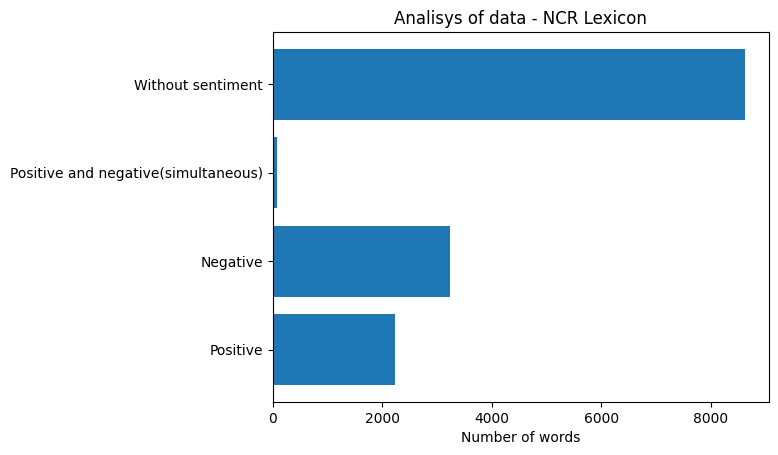

In [176]:
## Count the numbers of the negative and positives elements in lexico 

label = ('Positive', 'Negative', 'Positive and negative(simultaneous)','Without sentiment')
type_sentiment = np.arange(len(label))
numbers = [number_pos, number_neg, number_neut_pos,number_neut]

plt.barh(type_sentiment, numbers, align='center', alpha=1)
plt.yticks(type_sentiment, label)
plt.xlabel('Number of words')
plt.title('Analisys of data - NCR Lexicon')

plt.show()

In [177]:
#Uoload the lexico NCR data set

NCR_Lexicon = []
with open("NCR-Lexicon.csv", encoding="utf-8") as csvfile:
    reader = csv.DictReader(csvfile )
    for d in reader:
        NCR_Lexicon.append((d["English"],d["Positive"],d["Negative"])) 

In [178]:
dict = {}
a = {}
for i in lexicon.index:
    if lexicon['Positive'][i] == 1 and lexicon['Negative'][i] == 0: #positive
        #print(lexicon['English'][i],' ', lexicon['Positive'][i], ' ',lexicon['Negative'][i], 'olaa1')
        #print(dict)
        word = lexicon['English'][i] 
        sentiment = 1
        a = {word:sentiment}
    elif lexicon['Positive'][i] == 0 and lexicon['Negative'][i] == 1: #negative
        #print(lexicon['English'][i],' ', lexicon['Positive'][i], ' ',lexicon['Negative'][i], 'olaa2')
        #print(dict)
        word = lexicon['English'][i] 
        sentiment = -1
        a = {word:sentiment}
    dict.update(a)

In [179]:
#Numbers with elements in the lexico with positive and negative value or elements present in the dictionary (dict)
len(dict)

5474

In [180]:
# show the elements of the dict
dict

{'abandon': -1,
 'abandoned': -1,
 'abandonment': -1,
 'abba': 1,
 'abduction': -1,
 'aberrant': -1,
 'aberration': -1,
 'abhor': -1,
 'abhorrent': -1,
 'ability': 1,
 'abject': -1,
 'abnormal': -1,
 'abolish': -1,
 'abolition': -1,
 'abominable': -1,
 'abomination': -1,
 'abort': -1,
 'abortion': -1,
 'abortive': -1,
 'abovementioned': 1,
 'abrasion': -1,
 'abrogate': -1,
 'abscess': -1,
 'absence': -1,
 'absent': -1,
 'absentee': -1,
 'absenteeism': -1,
 'absolute': 1,
 'absolution': 1,
 'absorbed': 1,
 'absurd': -1,
 'absurdity': -1,
 'abundant': 1,
 'abuse': -1,
 'abysmal': -1,
 'abyss': -1,
 'academic': 1,
 'academy': 1,
 'acceptable': 1,
 'acceptance': 1,
 'accessible': 1,
 'accident': -1,
 'accidental': -1,
 'accolade': 1,
 'accommodation': 1,
 'accompaniment': 1,
 'accomplish': 1,
 'accomplished': 1,
 'accomplishment': 1,
 'accord': 1,
 'accountability': 1,
 'accountable': 1,
 'accredited': 1,
 'accueil': 1,
 'accurate': 1,
 'accursed': -1,
 'accusation': -1,
 'accusative': -1,

## Create a Lexico classifier - without data cleaning and without treatment of negation

In [181]:
result = []
list_sentiment = []

def classifier_1(twetters):
    for j in twetters:     
        sentence = j.lower()
        for i in sentence.split():
            #result.append(int(dict.get(i,0)))
            #print(result)
            score = sum(result)  
        if score > 0: 
            sentiment = j + ' ' , 'positive'
            list_sentiment.append(sentiment)
        elif score == 0:
            sentiment = j + ' ' , 'negative'
            list_sentiment.append(sentiment)

classifier_1(twetters)

In [182]:
list_sentiment

[('some count sheep, you count cats  ', 'negative'),
 ("We haven't been to Turning Stone in ages! Have a great time  ", 'negative'),
 ('What up  ', 'negative'),
 ("I'm good  ", 'negative'),
 ("I know, wonder if USER is going to buy an apartment after he's bought the jets  ",
  'negative'),
 ('ok cool  ', 'negative'),
 ("USER Facebook is down. It's not you guys  ", 'negative'),
 ('Sorry I forgot my &lt;sarcasm&gt; tags. I find I need to use those a lot.  ',
  'negative'),
 ('Dude. Your stuff on mutiny.in kinda egged me on Hats off ', 'negative'),
 ('1st year of high school  (vmbo, pretty simple :p) ', 'negative'),
 ("I have to agree with USER Design...I have Vista-the most hated of them all-and haven't had a freeze up in a year  ",
  'negative'),
 ('lining at the bottom of your bird cage is a good one  USER haha thats thats one thing that i really think CAN be generalised!! ;) ',
  'negative'),
 ('URL - "Only buy for your Secret Santa." ... Joyous fail  ', 'negative'),
 ('i really miss 

## Create a Lexico classifier - with data cleaning and without treatment of negation


## Create a Lexico classifier - with data cleaning and with treatment of negation

In [133]:
#for word in token_sent:
#    fdist[str(word)]+=1
#fdist
    

In [134]:
#top_20= fdist.most_common(20)
#top_20

In [135]:
#for word in token_sent:
#    if word.lemma_ != "-PRON-":
#        print(word.lemma_.lower().strip())

In [136]:
# List Comprehensions of our Lemma
#filtred_word = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in token_sent]

#filtred_word

In [137]:
#fdfdfggf
texto_1 ="".join(texto)
texto_1

'some count sheep, you count cats We haven\'t been to Turning Stone in ages! Have a great time What up I\'m good I know, wonder if USER is going to buy an apartment after he\'s bought the jets ok cool USER Facebook is down. It\'s not you guys Sorry I forgot my &lt;sarcasm&gt; tags. I find I need to use those a lot. Dude. Your stuff on mutiny.in kinda egged me on Hats off1st year of high school  (vmbo, pretty simple :p)I have to agree with USER Design...I have Vista-the most hated of them all-and haven\'t had a freeze up in a year lining at the bottom of your bird cage is a good one  USER haha thats thats one thing that i really think CAN be generalised!! ;)URL - "Only buy for your Secret Santa." ... Joyous fail i really miss her - I loved her videos/blogs. my husband has a deep and irrational fear of chiropractors.    My own gym sucks and has not massage facilities.No... just heard abt it... still my product uses xml good morning. I love fresh snow, all we have here is a lot of mud rob

In [138]:
# tokenizaçao 

single_tokinez = list(map(str.lower,word_tokenize(texto_1)))

print(single_tokinez)

['some', 'count', 'sheep', ',', 'you', 'count', 'cats', 'we', 'have', "n't", 'been', 'to', 'turning', 'stone', 'in', 'ages', '!', 'have', 'a', 'great', 'time', 'what', 'up', 'i', "'m", 'good', 'i', 'know', ',', 'wonder', 'if', 'user', 'is', 'going', 'to', 'buy', 'an', 'apartment', 'after', 'he', "'s", 'bought', 'the', 'jets', 'ok', 'cool', 'user', 'facebook', 'is', 'down', '.', 'it', "'s", 'not', 'you', 'guys', 'sorry', 'i', 'forgot', 'my', '&', 'lt', ';', 'sarcasm', '&', 'gt', ';', 'tags', '.', 'i', 'find', 'i', 'need', 'to', 'use', 'those', 'a', 'lot', '.', 'dude', '.', 'your', 'stuff', 'on', 'mutiny.in', 'kinda', 'egged', 'me', 'on', 'hats', 'off1st', 'year', 'of', 'high', 'school', '(', 'vmbo', ',', 'pretty', 'simple', ':', 'p', ')', 'i', 'have', 'to', 'agree', 'with', 'user', 'design', '...', 'i', 'have', 'vista-the', 'most', 'hated', 'of', 'them', 'all-and', 'have', "n't", 'had', 'a', 'freeze', 'up', 'in', 'a', 'year', 'lining', 'at', 'the', 'bottom', 'of', 'your', 'bird', 'cage'

In [139]:
#remove Stop_word
stop_words= []
stop_words = set(stopwords.words('english'))
filtered_word = [word for word in single_tokinez if word not in stop_words]

In [140]:
# Remove Ponctuation 
stop_word_en_punctu = stop_words.union(set(punctuation))
filtered_word = [word for word in single_tokinez if word not in stop_word_en_punctu]

In [141]:
print(filtered_word)

['count', 'sheep', 'count', 'cats', "n't", 'turning', 'stone', 'ages', 'great', 'time', "'m", 'good', 'know', 'wonder', 'user', 'going', 'buy', 'apartment', "'s", 'bought', 'jets', 'ok', 'cool', 'user', 'facebook', "'s", 'guys', 'sorry', 'forgot', 'lt', 'sarcasm', 'gt', 'tags', 'find', 'need', 'use', 'lot', 'dude', 'stuff', 'mutiny.in', 'kinda', 'egged', 'hats', 'off1st', 'year', 'high', 'school', 'vmbo', 'pretty', 'simple', 'p', 'agree', 'user', 'design', '...', 'vista-the', 'hated', 'all-and', "n't", 'freeze', 'year', 'lining', 'bottom', 'bird', 'cage', 'good', 'one', 'user', 'haha', 'thats', 'thats', 'one', 'thing', 'really', 'think', 'generalised', 'url', '``', 'buy', 'secret', 'santa', "''", '...', 'joyous', 'fail', 'really', 'miss', 'loved', 'videos/blogs', 'husband', 'deep', 'irrational', 'fear', 'chiropractors', 'gym', 'sucks', 'massage', 'facilities.no', '...', 'heard', 'abt', '...', 'still', 'product', 'uses', 'xml', 'good', 'morning', 'love', 'fresh', 'snow', 'lot', 'mud', '

## Bibloteca Spacy 

In [142]:
#

In [143]:
import spacy



nlp = spacy.load("en_core_web_sm")


In [144]:
spacy.__version__

'3.2.0'

In [145]:
text_spacy = "".join(texto)

In [146]:
doc = nlp(text_spacy)

In [147]:
for token in doc:
    print(token)

some
count
sheep
,
you
count
cats
We
have
n't
been
to
Turning
Stone
in
ages
!
Have
a
great
time
What
up
I
'm
good
I
know
,
wonder
if
USER
is
going
to
buy
an
apartment
after
he
's
bought
the
jets
ok
cool
USER
Facebook
is
down
.
It
's
not
you
guys
Sorry
I
forgot
my
&
lt;sarcasm&gt
;
tags
.
I
find
I
need
to
use
those
a
lot
.
Dude
.
Your
stuff
on
mutiny.in
kinda
egged
me
on
Hats
off1st
year
of
high
school
 
(
vmbo
,
pretty
simple
:
p)I
have
to
agree
with
USER
Design
...
I
have
Vista
-
the
most
hated
of
them
all
-
and
have
n't
had
a
freeze
up
in
a
year
lining
at
the
bottom
of
your
bird
cage
is
a
good
one
 
USER
haha
that
s
that
s
one
thing
that
i
really
think
CAN
be
generalised
!
!
;)
URL
-
"
Only
buy
for
your
Secret
Santa
.
"
...
Joyous
fail
i
really
miss
her
-
I
loved
her
videos
/
blogs
.
my
husband
has
a
deep
and
irrational
fear
of
chiropractors
.
   
My
own
gym
sucks
and
has
not
massage
facilities
.
No
...
just
heard
abt
it
...
still
my
product
uses
xml
good
morning
.
I
love
fresh
snow


In [148]:
# criar as frases 
token_sent= []
for token in doc.sents:
    
    token_sent.append(token)
    

In [149]:
#  pegar a primeira frase 
token_sent

[some count sheep, you count cats We haven't been to Turning Stone in ages!,
 Have a great time What up I'm good,
 I know, wonder if USER is going to buy an apartment after he's bought the jets ok cool USER Facebook is down.,
 It's not you guys,
 Sorry I forgot my &lt;sarcasm&gt; tags.,
 I find I need to use those a lot.,
 Dude.,
 Your stuff on mutiny.in kinda egged me on Hats off1st year of high school  (vmbo, pretty simple :p)I have to agree with USER Design...I have Vista-the most hated of them all-and haven't had a freeze up in a year lining at the bottom of your bird cage is a good one  USER haha thats thats one thing that i really think CAN be generalised!!,
 ;)URL - "Only buy for your Secret Santa." ...,
 Joyous fail i really miss her - I loved her videos/blogs.,
 my husband has a deep and irrational fear of chiropractors.,
    My own gym sucks and has not massage facilities.,
 No... just heard abt it...,
 still my product uses xml good morning.,
 I love fresh snow, all we have 

In [150]:
frase1 = token_sent[0]

### Part of Speech Tagging 

In [151]:
for token in frase1:
    print(token.text,token.pos_,token.dep_)

some DET det
count NOUN compound
sheep NOUN dep
, PUNCT punct
you PRON nsubj
count VERB ROOT
cats NOUN dobj
We PRON nsubj
have AUX aux
n't PART neg
been AUX relcl
to ADP prep
Turning PROPN compound
Stone PROPN pobj
in ADP prep
ages NOUN pobj
! PUNCT punct


#### Visualizaçao de Part Of speech

In [152]:
from spacy import displacy
displacy.render(frase1, style="dep")

### Named Entity Recognition

In [153]:
entities =[]

for ent in doc.ents:
    print(ent.text,ent.label_)
    entities.append(ent.text)

Turning Stone PERSON
USER ORG
USER Facebook ORG
USER Design ORG
Vista ORG
a year DATE
one CARDINAL
USER ORG
one CARDINAL
your Secret Santa PERSON
Luftwaffemuseum PERSON
German NORP
3 hours TIME
USER ORG
USER ORG
Todd PERSON
Aweber PERSON
Non-Profits ORG
Aweber PERSON
Gatlinburg GPE
Tenn. GPE
Today DATE
B-day DATE
R.I.P. ORG
4 hours TIME
two days DATE
3 more days DATE
a week DATE
J/K ORG
traci PERSON
two CARDINAL
USER ORG
tomorrow DATE
IM EATING OLD CANDY ORG
USER ORG
4 CARDINAL
santa photos GPE
GREAT LOC
PR Day DATE
these days DATE
FaD PERSON
FOB ORG
FUSE ORG
tonight TIME
about 1 CARDINAL
last night TIME
today DATE
tomorrow DATE
new year DATE
tonight TIME
eBay ORG
last year DATE
four CARDINAL
today DATE
harry connick PERSON
jr. GPE
400 CARDINAL
2.0 later this week DATE
Brian PERSON
Dreamland GPE
Mason ORG
7:30pm-8:30am CARDINAL
yesterday DATE
8:30-6:00 TIME
Jeeze PERSON
Carter PERSON
Chuck Chesse WORK_OF_ART
Chuck E. CHeese PERSON
8 CARDINAL
one week DATE
today DATE
Torah Tunes Website

In [154]:
displacy.render(doc, style="ent")

In [155]:
# 
filtered_entitie=[]
for word in filtered_word:
    if word in entities:
        filtered_entitie.append(word.upper())
    else:
        filtered_entitie.append(word.lower())
        

In [156]:
print(filtered_entitie)

['count', 'sheep', 'count', 'cats', "n't", 'turning', 'stone', 'ages', 'great', 'time', "'m", 'good', 'know', 'wonder', 'user', 'going', 'buy', 'apartment', "'s", 'bought', 'jets', 'ok', 'cool', 'user', 'facebook', "'s", 'guys', 'sorry', 'forgot', 'lt', 'sarcasm', 'gt', 'tags', 'find', 'need', 'use', 'lot', 'dude', 'stuff', 'mutiny.in', 'kinda', 'egged', 'hats', 'off1st', 'year', 'high', 'school', 'vmbo', 'pretty', 'simple', 'p', 'agree', 'user', 'design', '...', 'vista-the', 'hated', 'all-and', "n't", 'freeze', 'year', 'lining', 'bottom', 'bird', 'cage', 'good', 'ONE', 'user', 'haha', 'thats', 'thats', 'ONE', 'thing', 'really', 'think', 'generalised', 'url', '``', 'buy', 'secret', 'santa', "''", '...', 'joyous', 'fail', 'really', 'miss', 'loved', 'videos/blogs', 'husband', 'deep', 'irrational', 'fear', 'chiropractors', 'gym', 'sucks', 'massage', 'facilities.no', '...', 'heard', 'abt', '...', 'still', 'product', 'uses', 'xml', 'good', 'morning', 'love', 'fresh', 'snow', 'lot', 'mud', '

### analisar as frequencias das Palavras

## Machine learning


In [157]:
import string
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
parser = English()
punctuations = string.punctuation


In [158]:
# Build a list of stopwords to use to filter
stopwords = list(STOP_WORDS)

stopwords

['keep',
 'as',
 'out',
 'many',
 'third',
 'anyone',
 'full',
 'thus',
 'two',
 'several',
 'upon',
 'somehow',
 'them',
 'though',
 'be',
 'me',
 'mostly',
 'alone',
 'next',
 'within',
 'yourselves',
 '’m',
 'there',
 "'ll",
 'since',
 'very',
 'might',
 'under',
 'due',
 'him',
 'have',
 'for',
 'six',
 'everywhere',
 'they',
 'does',
 'will',
 'thereby',
 'doing',
 'except',
 'herein',
 'some',
 'once',
 'below',
 'yours',
 'before',
 'has',
 'hence',
 'the',
 'did',
 'latter',
 'to',
 'toward',
 'seem',
 'of',
 'further',
 'almost',
 'nevertheless',
 '’re',
 'thence',
 'four',
 'something',
 'again',
 'never',
 'at',
 'ever',
 'thereafter',
 'elsewhere',
 'hers',
 'others',
 'than',
 'yet',
 'whereas',
 'anything',
 'anywhere',
 '‘ve',
 'if',
 'from',
 '’d',
 "'re",
 'ca',
 'our',
 'made',
 'off',
 'hereafter',
 'twelve',
 'beforehand',
 'moreover',
 'fifty',
 'becomes',
 'same',
 'whoever',
 'still',
 'less',
 'without',
 'first',
 'about',
 'forty',
 'side',
 'and',
 '’ll',
 'b

## Machine Learning With SKlearn

In [159]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin 
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
# Splitting Data Set
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import recall_score,precision_score,f1_score

In [160]:
# Vectorization
vectorizer = CountVectorizer(stop_words='english') 
#classifier = LinearSVC()
tfvectorizer = TfidfVectorizer()
all_feactures= vectorizer.fit_transform(df_result.text.values.astype('str'))
#all_feactures= vectorizer.fit_transform(filtered_entitie)

In [161]:
# Using Tfidf
#tfvectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer)

all_feactures.shape

(39936, 32468)

In [162]:
vectorizer.vocabulary_

{'count': 6791,
 'sheep': 25265,
 'cats': 5150,
 'haven': 12813,
 'turning': 29347,
 'stone': 27020,
 'ages': 1490,
 'great': 12163,
 'time': 28549,
 'good': 11933,
 'know': 15765,
 'wonder': 31648,
 'user': 30080,
 'going': 11904,
 'buy': 4704,
 'apartment': 2117,
 'bought': 4092,
 'jets': 15007,
 'ok': 20087,
 'cool': 6657,
 'facebook': 9966,
 'guys': 12410,
 'sorry': 26345,
 'forgot': 10808,
 'lt': 16978,
 'sarcasm': 24542,
 'gt': 12316,
 'tags': 27758,
 'need': 19196,
 'use': 30071,
 'lot': 16908,
 'dude': 8759,
 'stuff': 27186,
 'mutiny': 18870,
 'kinda': 15639,
 'egged': 9092,
 'hats': 12798,
 '1st': 258,
 'year': 32078,
 'high': 13150,
 'school': 24720,
 'vmbo': 30608,
 'pretty': 22201,
 'simple': 25598,
 'agree': 1505,
 'design': 7842,
 'vista': 30580,
 'hated': 12790,
 'freeze': 10977,
 'lining': 16602,
 'bird': 3600,
 'cage': 4796,
 'haha': 12490,
 'thats': 28268,
 'thing': 28346,
 'really': 23116,
 'think': 28351,
 'generalised': 11547,
 'url': 30048,
 'secret': 24923,
 'san

In [163]:
X_train, X_test, y_train, y_test = train_test_split(all_feactures,df_result.code, test_size=0.3, random_state=47)

In [164]:
X_train.shape

(27955, 32468)

In [165]:
X_test.shape

(11981, 32468)

In [166]:
# Classificaçao com Linear SVC
classifier =LinearSVC()           

In [167]:
classifier.fit(X_train,y_train)

LinearSVC()

In [168]:
nr_correct = (y_test== classifier.predict(X_test)).sum()
nr_incorrect = y_test.size - nr_correct

## Resultado com o Modelo de Teste

In [169]:
model_test = classifier.predict(X_test)

In [170]:
print(" the number of  correct prection is ", nr_correct)
print(" the number of  incorrect prection is ", nr_incorrect)
print("Accuracy: ", metrics.accuracy_score(y_test, model_test))
print("Precision: ", metrics.precision_score(y_test, model_test, average="macro"))
print("Recall: ", metrics.recall_score(y_test, model_test, average="macro"))
print("F1-measure: ", metrics.f1_score(y_test, model_test, average="macro"))

 the number of  correct prection is  9940
 the number of  incorrect prection is  2041
Accuracy:  0.8296469409899007
Precision:  0.6896663772869039
Recall:  0.6447610883275152
F1-measure:  0.661198497992197


In [171]:
for (sample,pred) in zip(token_sent,model_test):
    print(sample,"Prediction=>",pred)

some count sheep, you count cats We haven't been to Turning Stone in ages! Prediction=> 1
Have a great time What up I'm good Prediction=> 0
I know, wonder if USER is going to buy an apartment after he's bought the jets ok cool USER Facebook is down. Prediction=> 1
It's not you guys Prediction=> 1
Sorry I forgot my &lt;sarcasm&gt; tags. Prediction=> 1
I find I need to use those a lot. Prediction=> 1
Dude. Prediction=> 0
Your stuff on mutiny.in kinda egged me on Hats off1st year of high school  (vmbo, pretty simple :p)I have to agree with USER Design...I have Vista-the most hated of them all-and haven't had a freeze up in a year lining at the bottom of your bird cage is a good one  USER haha thats thats one thing that i really think CAN be generalised!! Prediction=> 1
;)URL - "Only buy for your Secret Santa." ... Prediction=> 1
Joyous fail i really miss her - I loved her videos/blogs. Prediction=> 1
my husband has a deep and irrational fear of chiropractors. Prediction=> 0
   My own gym 